# SUMMARY
## Source: News API

### Good:
* Fairly straightforward to use
* Can search for keywords in title, description and/or article contents
* News sources seem to have large geographical coverage (although hard to tell for sure without locations in the metadata

### Bad:
* Returns minimal information about the article (title, date, author, source, url)
* Doesn't provide geographical info for the articles
* Would require webscraping of urls to get article contents, which would need to be custom for each news source
* No actual categorisations of articles. Would require a dictionary of keywords to search for


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
API_key = "insert_api_key_here"

url = https://newsapi.org/docs/endpoints/everything

### Default query - search for articles mentioning "Apple"

In [3]:
url = ("https://newsapi.org/v2/everything?"
       "q=Apple&"
       "from=2022-10-31&"
       "sortBy=popularity&"
       f"apiKey={API_key}")

response = requests.get(url)

print(response.json())

{'status': 'ok', 'totalResults': 0, 'articles': [{'title': 'The Morning After: Elon Musk wants users to pay for verification', 'author': 'Daniel Cooper', 'source': {'Id': 'engadget', 'Name': 'Engadget'}, 'publishedAt': '2022-10-31T11:15:47Z', 'url': 'https://www.engadget.com/the-morning-after-elon-musk-wants-you-to-pay-for-verification-111547920.html'}, {'title': 'US midterm elections: Why five states have slavery on the ballot in 2022', 'author': 'https://www.facebook.com/bbcnews', 'source': {'Id': 'bbc-news', 'Name': 'BBC News'}, 'publishedAt': '2022-10-31T01:01:09Z', 'url': 'https://www.bbc.co.uk/news/world-us-canada-63338784'}, {'title': 'Apple workers in Australia gear up for more strike action - Reuters', 'author': None, 'source': {'Id': 'reuters', 'Name': 'Reuters'}, 'publishedAt': '2022-10-31T04:47:00Z', 'url': 'https://www.reuters.com/technology/apple-workers-australia-gear-up-more-strike-action-2022-10-31/'}, {'title': 'Foxconn COVID woes may hit up to 30% of iPhone Nov shipm

In [4]:
len(response.json()["articles"])

95

In [5]:
# NEWS SOURCES WHICH ARE BEING SCRAPED
source_counts = pd.Series([article["source"]["Name"] for article in response.json()["articles"]]).value_counts()
source_counts.keys()

Index(['Forbes', 'Reuters', 'DIE WELT', 'Techbang.com', 'Antyweb.pl',
       'GSMArena.com', 'Applesfera.com', 'Clubic', 'Nextpit.de', '01net.com',
       'Tomshw.it', 'Lifehacker.ru', 'Inside.com.tw', 'tagesschau.de',
       'Andro4all.com', 'Digiday', 'Journal du geek', 'The Guardian',
       'Business Insider', 'Hipertextual', 'AppleInsider', 'ComputerBase',
       'ClickZ', 'Impress.co.jp', 'Appbank.net', 'Livedoor.biz', 'Numerama',
       'Rivals.com', 'Elblogsalmon.com', 'Hdblog.it', 'Deseret News',
       'Süddeutsche Zeitung', 'Basicthinking.de', 'Karapaia.com',
       'Businessinsider.de', 'Il Sole 24 Ore', 'CBC News', 'Engadget',
       'Mckinsey.com', 'Motley Fool', 'Xataka.com', 'Ethanschoonover.com',
       'heise online', 'Toprankblog.com', 'Elespanol.com', 'Gizmodo.jp',
       'MakeUseOf', 'Search Engine Journal', 'Presse-citron', 'BGR', 'iMore',
       'Vox', 'Les Numériques', 'Caschys Blog', 'Frandroid', 'Lenta',
       'Touchlab.jp', 'Quartz India', 'BBC News', 'Bloom

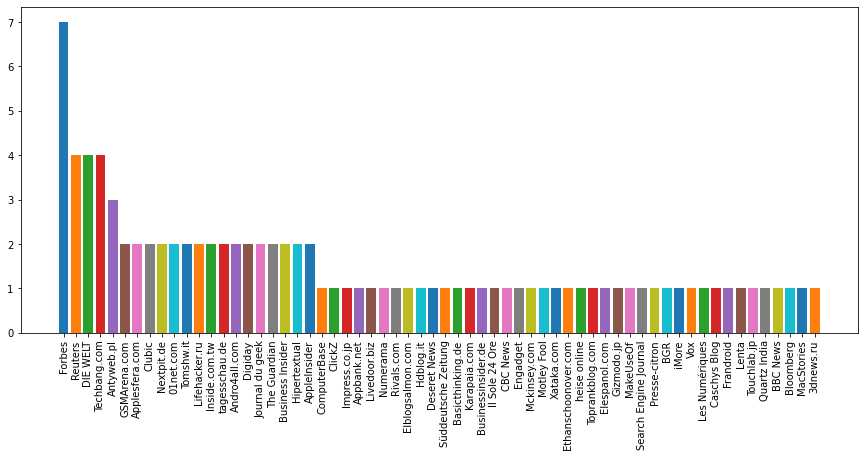

In [6]:
source_counts
plt.figure(figsize=(15,6))
for i, (name, counts) in enumerate(source_counts.items()):
    plt.bar(i, counts)
plt.xticks(range(i+1), source_counts.keys(), rotation=90)
plt.show()

In [7]:
# METADATA AVAILABLE WITH EACH ARTICLE
response.json()["articles"][0]

{'title': 'The Morning After: Elon Musk wants users to pay for verification',
 'author': 'Daniel Cooper',
 'source': {'Id': 'engadget', 'Name': 'Engadget'},
 'publishedAt': '2022-10-31T11:15:47Z',
 'url': 'https://www.engadget.com/the-morning-after-elon-musk-wants-you-to-pay-for-verification-111547920.html'}

### Query functionality

* <b>apiKey</b>
* <b>q</b> - Keywords or phrases to search for in the article title and body. (can include AND, OR, NOT. max 500 chars).
* <b>searchIn</b> - fields to restrict q to. Can be "title", "description", "content", or any combination of these.
* <b>sources</b> - comma-separated list of news sources to restrict search to.
* <b>domains</b> - another way of filtering by news source.
* <b>excludeDomains</b> - list of news sources to exclude from search.
* <b>from</b> - datetime to filter news articles. Used in combo with "to"
* <b>to</b> - datetime to filter news articles. Used in combo with "from"
* <b>language</b> - code of the languages you want to get news articles for. Presumably we will only want "en"
* <b>sortBy</b> - "relevancy", "popularity", "publishedAt"
* <b>pageSize</b> - the number of results to return per page (default: 100, maximum: 100)
* <b>page</b> - to "page" through the results (default: 1)

In [8]:
country_filters = [
    "ae", "ar", "at", "au", "be", "bg", "br", "ca", "ch", "cn", "co", "cu", "cz", "de", "eg", "fr", 
    "gb", "gr", "hk", "hu", "id", "ie", "il", "in", "it", "jp", "kr", "lt", "lv", "ma", "mx", "my", 
    "ng", "nl", "no", "nz", "ph", "pl", "pt", "ro", "rs", "ru", "sa", "se", "sg", "si", "sk", "th", 
    "tr", "tw", "ua", "us", "ve", "za",
]

In [9]:
category_filters = [
    "business", "entertainment", "general", "health",
    "science", "sports", "technology"
]

### Query for human trafficking related articles

#### Exact match of news articles with "Human Trafficking" mentioned in the article.
#### Getting a few not related to human trafficking here e.g. the Witcher article

In [10]:
url = ("https://newsapi.org/v2/everything?"
       'q="Human Trafficking"&'
       "from=2022-10-31&"
       "sortBy=popularity&"
       "language=en&"
       f"apiKey={API_key}")

response = requests.get(url)

print(response.json())

{'status': 'ok', 'totalResults': 0, 'articles': [{'title': 'EU funds border control deal in Egypt with migration via Libya on rise', 'author': 'Georgi Gotev', 'source': {'Id': None, 'Name': 'EURACTIV'}, 'publishedAt': '2022-10-31T06:10:17Z', 'url': 'https://www.euractiv.com/section/global-europe/news/eu-funds-border-control-deal-in-egypt-with-migration-via-libya-on-rise/'}, {'title': 'Holy Sh*t, Henry Cavill Quit ‘The Witcher’', 'author': 'Mike Redmond', 'source': {'Id': None, 'Name': 'Pajiba.com'}, 'publishedAt': '2022-10-31T01:00:00Z', 'url': 'https://www.pajiba.com/pajiba_love/why-did-henry-cavill-really-quit-the-witcher.php'}, {'title': 'Lagos woman jailed 10 years for sex trafficking', 'author': 'Onozure Dania', 'source': {'Id': None, 'Name': 'The Punch'}, 'publishedAt': '2022-10-31T00:11:01Z', 'url': 'https://punchng.com/lagos-woman-jailed-10-years-for-sex-trafficking/'}, {'title': 'Cops arrest ex-politician who allegedly forced patients at treatment centres to work without pay',

In [11]:
for article in response.json()["articles"]:
    print(article["title"])
    print(article["url"])
    print()

EU funds border control deal in Egypt with migration via Libya on rise
https://www.euractiv.com/section/global-europe/news/eu-funds-border-control-deal-in-egypt-with-migration-via-libya-on-rise/

Holy Sh*t, Henry Cavill Quit ‘The Witcher’
https://www.pajiba.com/pajiba_love/why-did-henry-cavill-really-quit-the-witcher.php

Lagos woman jailed 10 years for sex trafficking
https://punchng.com/lagos-woman-jailed-10-years-for-sex-trafficking/

Cops arrest ex-politician who allegedly forced patients at treatment centres to work without pay
https://www.thestar.com.my/news/nation/2022/10/31/cops-arrest-ex-politician-who-allegedly-forced-patients-at-treatment-centres-to-work-without-pay

India’s Tea Estate Workers: Designing an Empathic Behavioural System to Motivate Migratory Behaviour
https://blogs.lse.ac.uk/southasia/2022/10/31/indias-tea-estate-workers-designing-an-empathic-behavioural-system-to-motivate-migratory-behaviour/

Chinese man in custody on human trafficking charges
https://www.th

#### A more advanced query, searching for multiple keywords which appear in the title or description
#### Get some repeats of articles from different sources (e.g. Richard Branson article)

In [12]:
keywords = [
    "human trafficking", "modern slavery", "sexual exploitation", "trafficking", "domestic servitude",
    "forced labour", "debt bondage", "forced begging", "forced marriage", "organ removal"
]

query = '"' + '"OR"'.join(keywords) + '"&'

url = ("https://newsapi.org/v2/everything?"
       f'q={query}'
       "from=2022-10-31&"
       "sortBy=popularity&"
       "language=en&"
       "searchIn=title,description&"
       f"apiKey={API_key}")

response = requests.get(url)

print(response.json())

{'status': 'ok', 'totalResults': 0, 'articles': [{'title': 'Sir Richard Branson declines Singapore death penalty TV debate invitation', 'author': 'BBC', 'source': {'Id': None, 'Name': 'Yahoo Entertainment'}, 'publishedAt': '2022-10-31T04:36:39Z', 'url': 'https://news.yahoo.com/sir-richard-branson-declines-singapore-043639773.html'}, {'title': 'Man sentenced to death via Zoom for drug trafficking acquitted after appeal with new evidence', 'author': None, 'source': {'Id': None, 'Name': 'CNA'}, 'publishedAt': '2022-10-31T06:37:00Z', 'url': 'https://www.channelnewsasia.com/singapore/punithan-genasan-man-sentenced-death-zoom-drug-trafficking-acquitted-3034316'}, {'title': 'Lagos woman jailed 10 years for sex trafficking', 'author': 'Onozure Dania', 'source': {'Id': None, 'Name': 'The Punch'}, 'publishedAt': '2022-10-31T00:11:01Z', 'url': 'https://punchng.com/lagos-woman-jailed-10-years-for-sex-trafficking/'}, {'title': "Juárez Cartel Leader 'El Viceroy' Receives Additional 20 Years For Drug

In [13]:
for article in response.json()["articles"]:
    print(article["title"])
    print(article["url"])
    print()

Sir Richard Branson declines Singapore death penalty TV debate invitation
https://news.yahoo.com/sir-richard-branson-declines-singapore-043639773.html

Man sentenced to death via Zoom for drug trafficking acquitted after appeal with new evidence
https://www.channelnewsasia.com/singapore/punithan-genasan-man-sentenced-death-zoom-drug-trafficking-acquitted-3034316

Lagos woman jailed 10 years for sex trafficking
https://punchng.com/lagos-woman-jailed-10-years-for-sex-trafficking/

Juárez Cartel Leader 'El Viceroy' Receives Additional 20 Years For Drug Trafficking
http://www.borderlandbeat.com/2022/10/juarez-cartel-leader-el-viceroy.html

Sir Richard Branson declines Singapore death penalty TV debate invitation
https://www.bbc.co.uk/news/business-63451982

Cops arrest ex-politician who allegedly forced patients at treatment centres to work without pay
https://www.thestar.com.my/news/nation/2022/10/31/cops-arrest-ex-politician-who-allegedly-forced-patients-at-treatment-centres-to-work-with

#### How do these articles then look when webscraping with BeautifulSoup? 